# mor

In [1]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="mor")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="mor")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="mor")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="mor")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="mor")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="mor")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 6
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.020334
H2O/SiO2,0.041654
MOH/SiO2,0.632635
temperature,0.265856
time,0.039521


,false,mor
false,353,0
mor,2,56


,false,mor
false,116,2
mor,3,16


正解率(Accuracy) : 訓練 0.9951338199513382, 検証 0.9635036496350365
適合率(Precision) : 訓練 1.0, 検証 0.8888888888888888
再現率(Recall) : 訓練 0.9655172413793104, 検証 0.8421052631578947
F1スコア : 訓練 0.9824561403508771, 検証 0.8648648648648649


In [2]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_mor_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_mor_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_mor_gs_Amorphous_MOH.pdf'

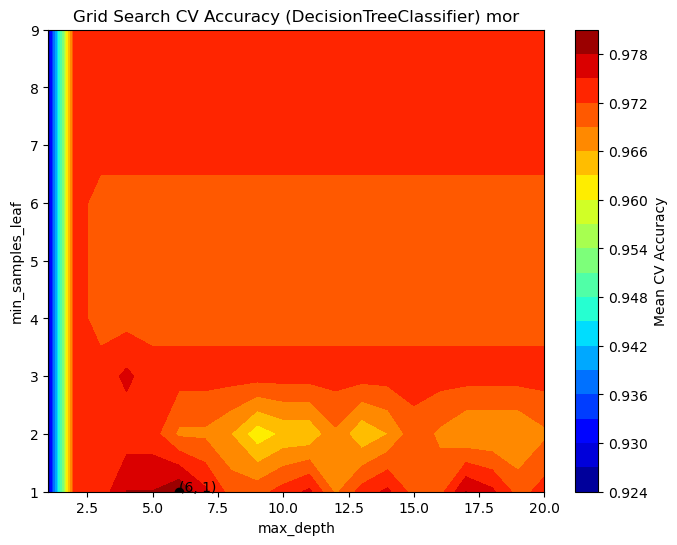

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) mor')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# jbw

In [4]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="jbw")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="jbw")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="jbw")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="jbw")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="jbw")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="jbw")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 7
最適な最小サンプル数: 5


,importance
Al2O3/SiO2,0.000000
H2O/SiO2,0.350920
MOH/SiO2,0.463501
temperature,0.183968
time,0.001610


,false,jbw
false,391,3
jbw,2,15


,false,jbw
false,131,0
jbw,0,6


正解率(Accuracy) : 訓練 0.9878345498783455, 検証 1.0
適合率(Precision) : 訓練 0.8333333333333334, 検証 1.0
再現率(Recall) : 訓練 0.8823529411764706, 検証 1.0
F1スコア : 訓練 0.8571428571428571, 検証 1.0


In [5]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_jbw_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_jbw_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_jbw_gs_Amorphous_MOH.pdf'

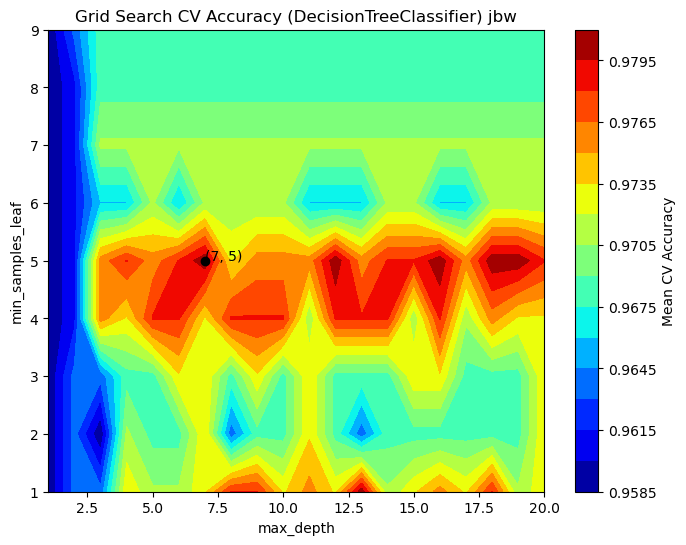

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) jbw')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# d6r

In [7]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d6r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d6r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d6r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d6r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d6r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 13
最適な最小サンプル数: 2


,importance
Al2O3/SiO2,0.251034
H2O/SiO2,0.248133
MOH/SiO2,0.222757
temperature,0.160069
time,0.118008


,d6r,false
d6r,135,1
false,19,256


,d6r,false
d6r,34,12
false,18,73


正解率(Accuracy) : 訓練 0.9513381995133819, 検証 0.781021897810219
適合率(Precision) : 訓練 0.8766233766233766, 検証 0.6538461538461539
再現率(Recall) : 訓練 0.9926470588235294, 検証 0.7391304347826086
F1スコア : 訓練 0.9310344827586207, 検証 0.6938775510204082


In [8]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_d6r_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_d6r_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_d6r_gs_Amorphous_MOH.pdf'

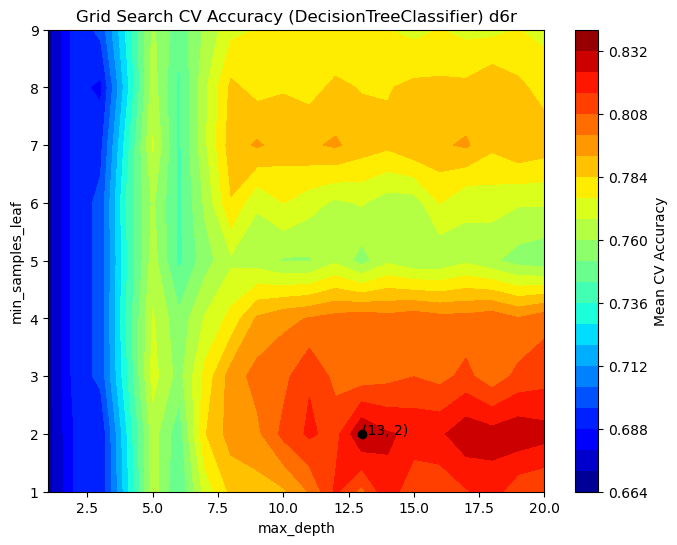

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) d6r')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# d8r

In [10]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d8r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d8r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d8r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d8r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d8r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d8r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 20
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.331083
H2O/SiO2,0.156743
MOH/SiO2,0.195261
temperature,0.100657
time,0.216257


,d8r,false
d8r,46,0
false,0,365


,d8r,false
d8r,11,4
false,4,118


正解率(Accuracy) : 訓練 1.0, 検証 0.9416058394160584
適合率(Precision) : 訓練 1.0, 検証 0.7333333333333333
再現率(Recall) : 訓練 1.0, 検証 0.7333333333333333
F1スコア : 訓練 1.0, 検証 0.7333333333333333


In [11]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_d8r_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_d8r_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_d8r_gs_Amorphous_MOH.pdf'

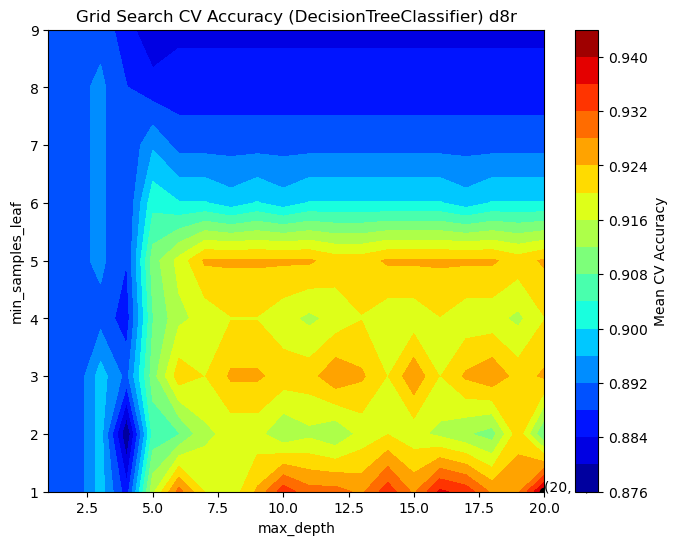

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) d8r')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# can

In [13]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="can")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="can")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="can")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="can")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="can")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="can")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 13
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.194183
H2O/SiO2,0.168674
MOH/SiO2,0.262797
temperature,0.253687
time,0.120658


,can,false
can,83,0
false,1,327


,can,false
can,24,4
false,4,105


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.9416058394160584
適合率(Precision) : 訓練 0.9880952380952381, 検証 0.8571428571428571
再現率(Recall) : 訓練 1.0, 検証 0.8571428571428571
F1スコア : 訓練 0.9940119760479041, 検証 0.8571428571428571


In [14]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_can_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_can_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_can_gs_Amorphous_MOH.pdf'

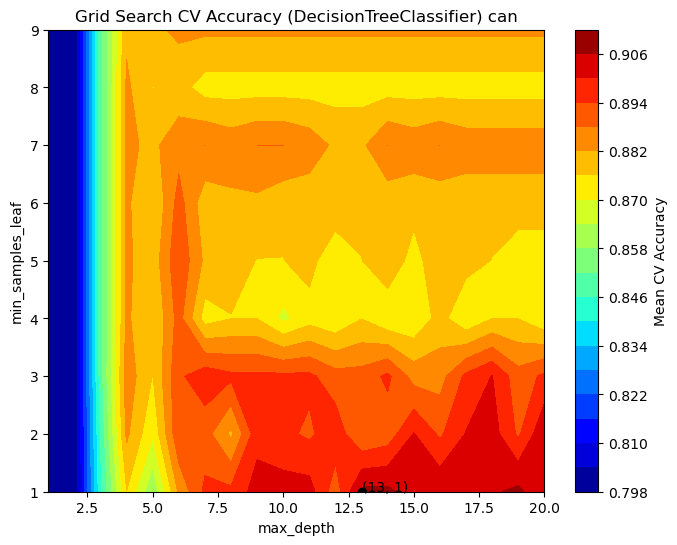

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) can')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# sod

In [16]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=6)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="sod")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="sod")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="sod")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="sod")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="sod")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="sod")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 5
最適な最小サンプル数: 2


,importance
Al2O3/SiO2,0.121178
H2O/SiO2,0.183343
MOH/SiO2,0.044280
temperature,0.601589
time,0.049610


,false,sod
false,297,1
sod,10,103


,false,sod
false,91,8
sod,5,33


正解率(Accuracy) : 訓練 0.9732360097323601, 検証 0.9051094890510949
適合率(Precision) : 訓練 0.9903846153846154, 検証 0.8048780487804879
再現率(Recall) : 訓練 0.911504424778761, 検証 0.868421052631579
F1スコア : 訓練 0.9493087557603687, 検証 0.8354430379746836


In [17]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_sod_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_sod_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_sod_gs_Amorphous_MOH.pdf'

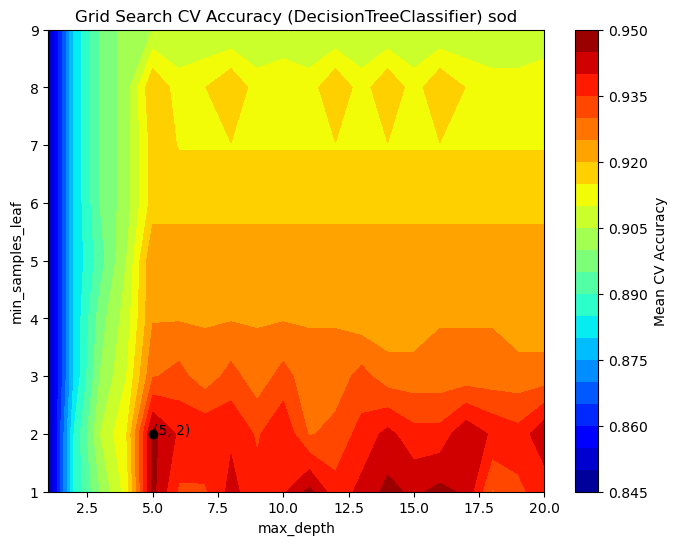

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) sod')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# lta

In [19]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="lta")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="lta")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="lta")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="lta")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="lta")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="lta")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 6
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.163760
H2O/SiO2,0.244667
MOH/SiO2,0.171899
temperature,0.400287
time,0.019387


,false,lta
false,351,0
lta,9,51


,false,lta
false,115,2
lta,5,15


正解率(Accuracy) : 訓練 0.9781021897810219, 検証 0.948905109489051
適合率(Precision) : 訓練 1.0, 検証 0.8823529411764706
再現率(Recall) : 訓練 0.85, 検証 0.75
F1スコア : 訓練 0.918918918918919, 検証 0.8108108108108109


In [20]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_lta_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_lta_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_lta_gs_Amorphous_MOH.pdf'

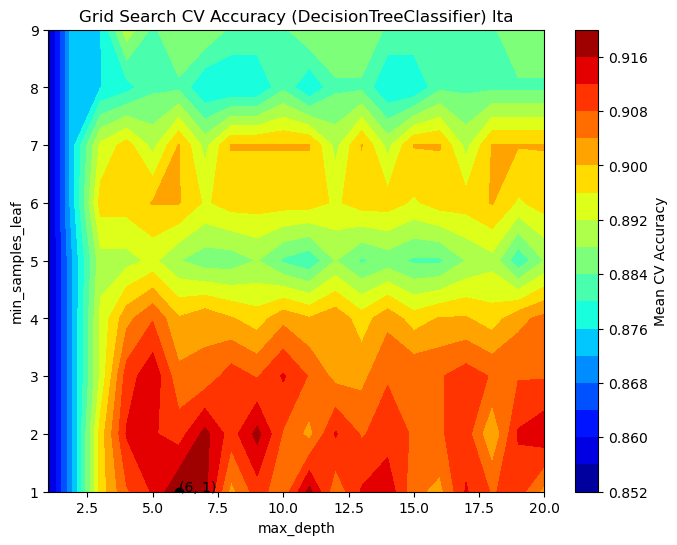

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) lta')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 4

In [22]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 16]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 14
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.131637
H2O/SiO2,0.123736
MOH/SiO2,0.524993
temperature,0.179568
time,0.040066


,4,false
4,236,0
false,2,173


,4,false
4,71,8
false,9,49


正解率(Accuracy) : 訓練 0.9951338199513382, 検証 0.8759124087591241
適合率(Precision) : 訓練 0.9915966386554622, 検証 0.8875
再現率(Recall) : 訓練 1.0, 検証 0.8987341772151899
F1スコア : 訓練 0.9957805907172996, 検証 0.8930817610062893


In [23]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_4_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_4_gs_Amorphous_MOH'
決定木.view()

'zeolite_lta_gs_Amorphous_MOH.pdf'

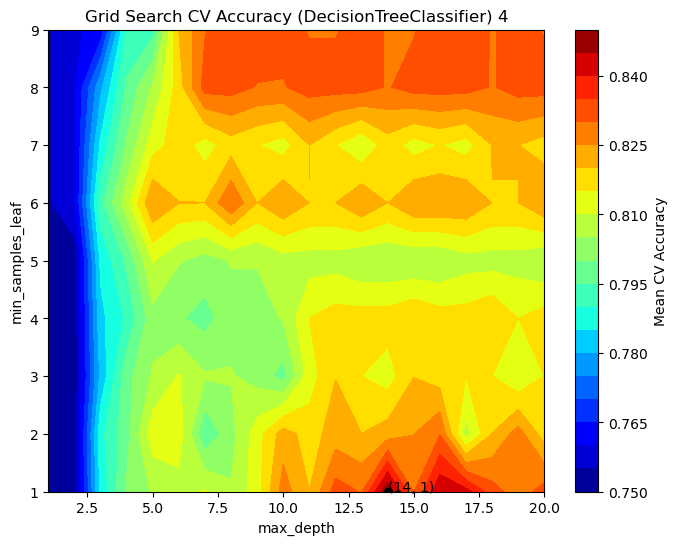

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 4')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 6

In [25]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 17]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 14
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.134726
H2O/SiO2,0.185499
MOH/SiO2,0.427872
temperature,0.111079
time,0.140824


,6,false
6,230,0
false,10,171


,6,false
6,69,7
false,10,51


正解率(Accuracy) : 訓練 0.975669099756691, 検証 0.8759124087591241
適合率(Precision) : 訓練 0.9583333333333334, 検証 0.8734177215189873
再現率(Recall) : 訓練 1.0, 検証 0.9078947368421053
F1スコア : 訓練 0.9787234042553191, 検証 0.8903225806451613


In [26]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_6_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_6_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_6_gs_Amorphous_MOH.pdf'

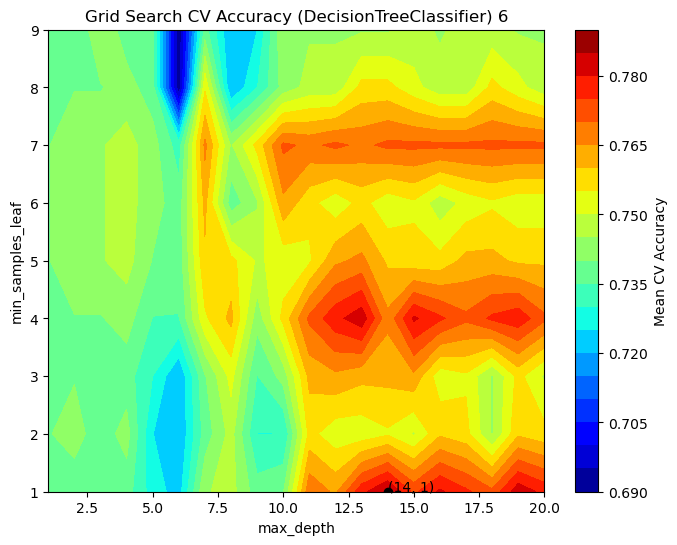

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 6')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 8

In [28]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 18]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="8")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="8")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="8")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="8")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="8")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="8")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 17
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.280267
H2O/SiO2,0.162620
MOH/SiO2,0.224584
temperature,0.162580
time,0.169949


,8,false
8,131,0
false,0,280


,8,false
8,30,14
false,11,82


正解率(Accuracy) : 訓練 1.0, 検証 0.8175182481751825
適合率(Precision) : 訓練 1.0, 検証 0.7317073170731707
再現率(Recall) : 訓練 1.0, 検証 0.6818181818181818
F1スコア : 訓練 1.0, 検証 0.7058823529411765


In [29]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_8_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_8_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_8_gs_Amorphous_MOH.pdf'

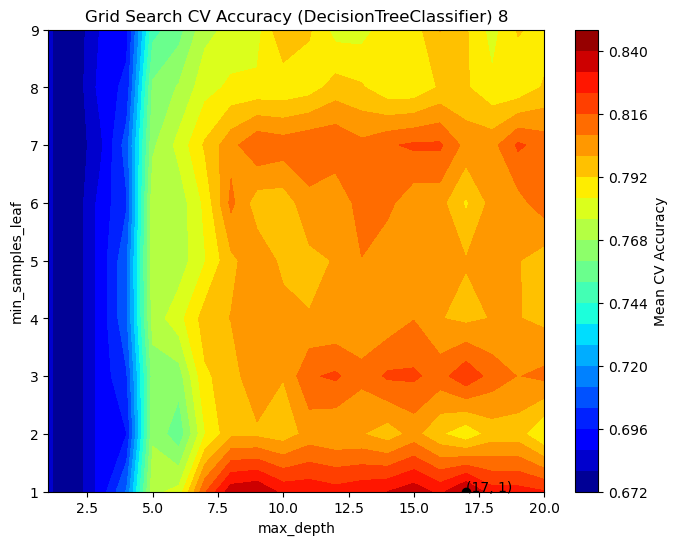

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 8')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 5-1

In [31]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 19]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="5-1")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="5-1")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="5-1")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="5-1")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="5-1")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="5-1")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 5
最適な最小サンプル数: 3


,importance
Al2O3/SiO2,0.011063
H2O/SiO2,0.061518
MOH/SiO2,0.781474
temperature,0.118253
time,0.027692


,5-1,false
5-1,58,5
false,3,345


,5-1,false
5-1,18,3
false,2,114


正解率(Accuracy) : 訓練 0.9805352798053528, 検証 0.9635036496350365
適合率(Precision) : 訓練 0.9508196721311475, 検証 0.9
再現率(Recall) : 訓練 0.9206349206349206, 検証 0.8571428571428571
F1スコア : 訓練 0.9354838709677419, 検証 0.8780487804878049


In [32]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_5-1_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_5-1_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_5-1_gs_Amorphous_MOH.pdf'

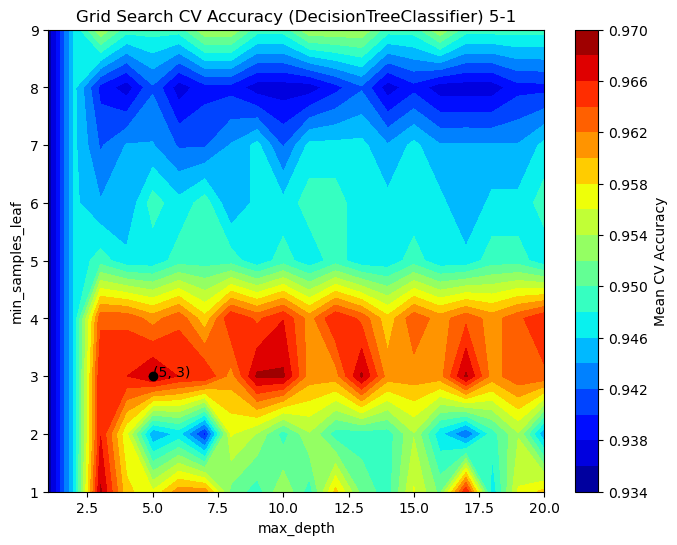

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 5-1')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 4-2

In [34]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 20]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4-2")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4-2")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 14
最適な最小サンプル数: 2


,importance
Al2O3/SiO2,0.251997
H2O/SiO2,0.257280
MOH/SiO2,0.199843
temperature,0.161723
time,0.129157


,4-2,false
4-2,135,1
false,19,256


,4-2,false
4-2,35,11
false,15,76


正解率(Accuracy) : 訓練 0.9513381995133819, 検証 0.8102189781021898
適合率(Precision) : 訓練 0.8766233766233766, 検証 0.7
再現率(Recall) : 訓練 0.9926470588235294, 検証 0.7608695652173914
F1スコア : 訓練 0.9310344827586207, 検証 0.7291666666666666


In [35]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_mor_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_mor_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_mor_gs_Amorphous_MOH.pdf'

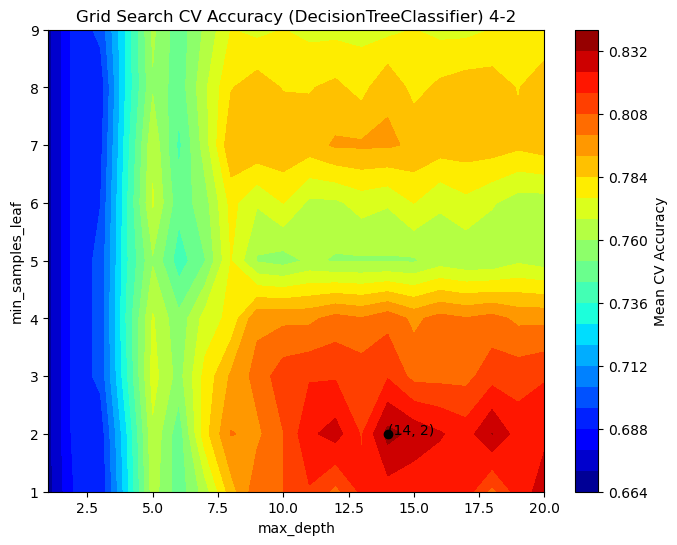

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 4-2')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 6-2

In [37]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6-2")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6-2")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 9
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.233550
H2O/SiO2,0.143247
MOH/SiO2,0.289461
temperature,0.210997
time,0.122745


,6-2,false
6-2,97,18
false,2,294


,6-2,false
6-2,30,9
false,8,90


正解率(Accuracy) : 訓練 0.9513381995133819, 検証 0.8759124087591241
適合率(Precision) : 訓練 0.9797979797979798, 検証 0.7894736842105263
再現率(Recall) : 訓練 0.8434782608695652, 検証 0.7692307692307693
F1スコア : 訓練 0.9065420560747663, 検証 0.7792207792207793


In [38]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_6-2_gs_Amorphous_MOH', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_6-2_gs_Amorphous_MOH'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_6-2_gs_Amorphous_MOH.pdf'

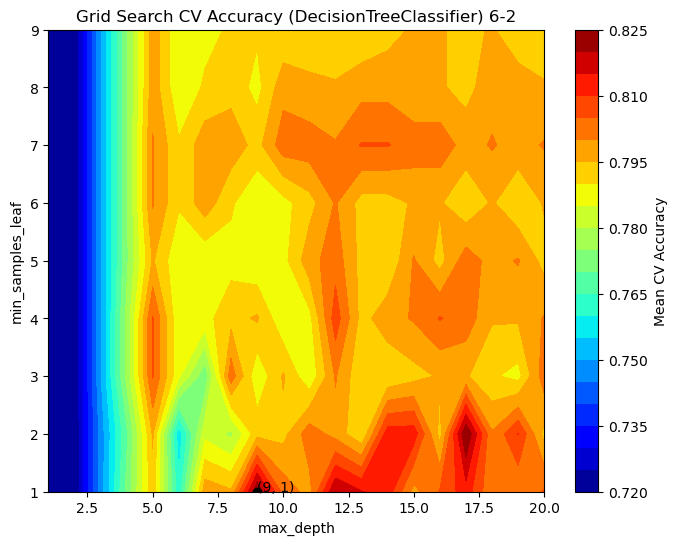

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 6-2')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()